# Pre-Evaluation Questionnaire Analysis (French)

## 1. Load Data

In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = "Pre-Evaluation (French)(1-31).xlsx"
df = pd.read_excel(file_path)

# Drop completely empty rows (e.g., test or incomplete responses)
df.dropna(how='all', inplace=True)

# Preview data
df.head()


,ID,Startzeit,Fertigstellungszeit,E-Mail,Name,Zeitpunkt der letzten Änderung,Avez-vous déjà travaillé avec ou prodigué des soins à des patients ?,Avez-vous déjà travaillé ou soigné des personnes atteintes de schizophrénie ?,Mes patients se sentent mieux lorsque je comprends leurs sentiments.,Il m'est difficile d'envisager les choses du point de vue de mes patients.,...,Angoissé(e),Attentif(ve),Honteux(se),Enthousiaste,Irrité(e),Inspiré(e),Nerveux(se),Intéressé(e),Alerte,Craintif(ve)
0,1,2025-04-15 15:04:04,2025-04-15 15:05:14,anonymous,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2025-04-24 11:20:08,2025-04-24 11:20:43,anonymous,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2025-05-08 12:47:13,2025-05-08 12:49:51,anonymous,NaN,NaN,5.0,5.0,6.0,5.0,...,2.0,4.0,1.0,3.0,1.0,3.0,3.0,5.0,4.0,3.0
3,4,2025-05-08 12:47:02,2025-05-08 12:49:58,anonymous,NaN,NaN,5.0,2.0,6.0,2.0,...,1.0,5.0,1.0,3.0,1.0,4.0,2.0,5.0,4.0,3.0
4,5,2025-05-08 12:47:11,2025-05-08 12:50:04,anonymous,NaN,NaN,4.0,4.0,6.0,2.0,...,2.0,5.0,1.0,1.0,2.0,1.0,2.0,4.0,5.0,2.0


## 2. Clean and Prepare

In [5]:

# Drop metadata columns not relevant to analysis
meta_cols = ['ID', 'Startzeit', 'Fertigstellungszeit', 'E-Mail', 'Name', 'Zeitpunkt der letzten Änderung']
df_clean = df.drop(columns=meta_cols, errors='ignore')

# Convert to numeric where possible
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Drop rows with too many missing values
df_clean = df_clean.dropna(thresh=5)


## 3. Summary Statistics

In [6]:

# Mean scores per question
means = df_clean.mean().sort_values()

# Display top and bottom
means.head(), means.tail()


(Je pense que l'émotion n'a pas sa place dans le traitement des maladies médicales.                                                                                    1.034483
 Honteux(se)                                                                                                                                                           1.241379
 Demander aux patients ce qui se passe dans leur vie personnelle n'aide pas à comprendre leurs plaintes physiques.                                                     1.655172
 Irrité(e)                                                                                                                                                             1.758621
 J'essaie de ne pas prêter attention aux émotions de mes patients lorsque je recueille leurs antécédents ou que je leur pose des questions sur leur santé physique.    1.862069
 dtype: float64,
 Mes patients apprécient que je comprenne leurs sentiments, ce qui est thérapeutique en soi.           

## 4. Visualize Mean Scores

/var/folders/yw/fnjjn59j6w7_8fvtgz49bpk80000gn/T/ipykernel_67479/2567944287.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


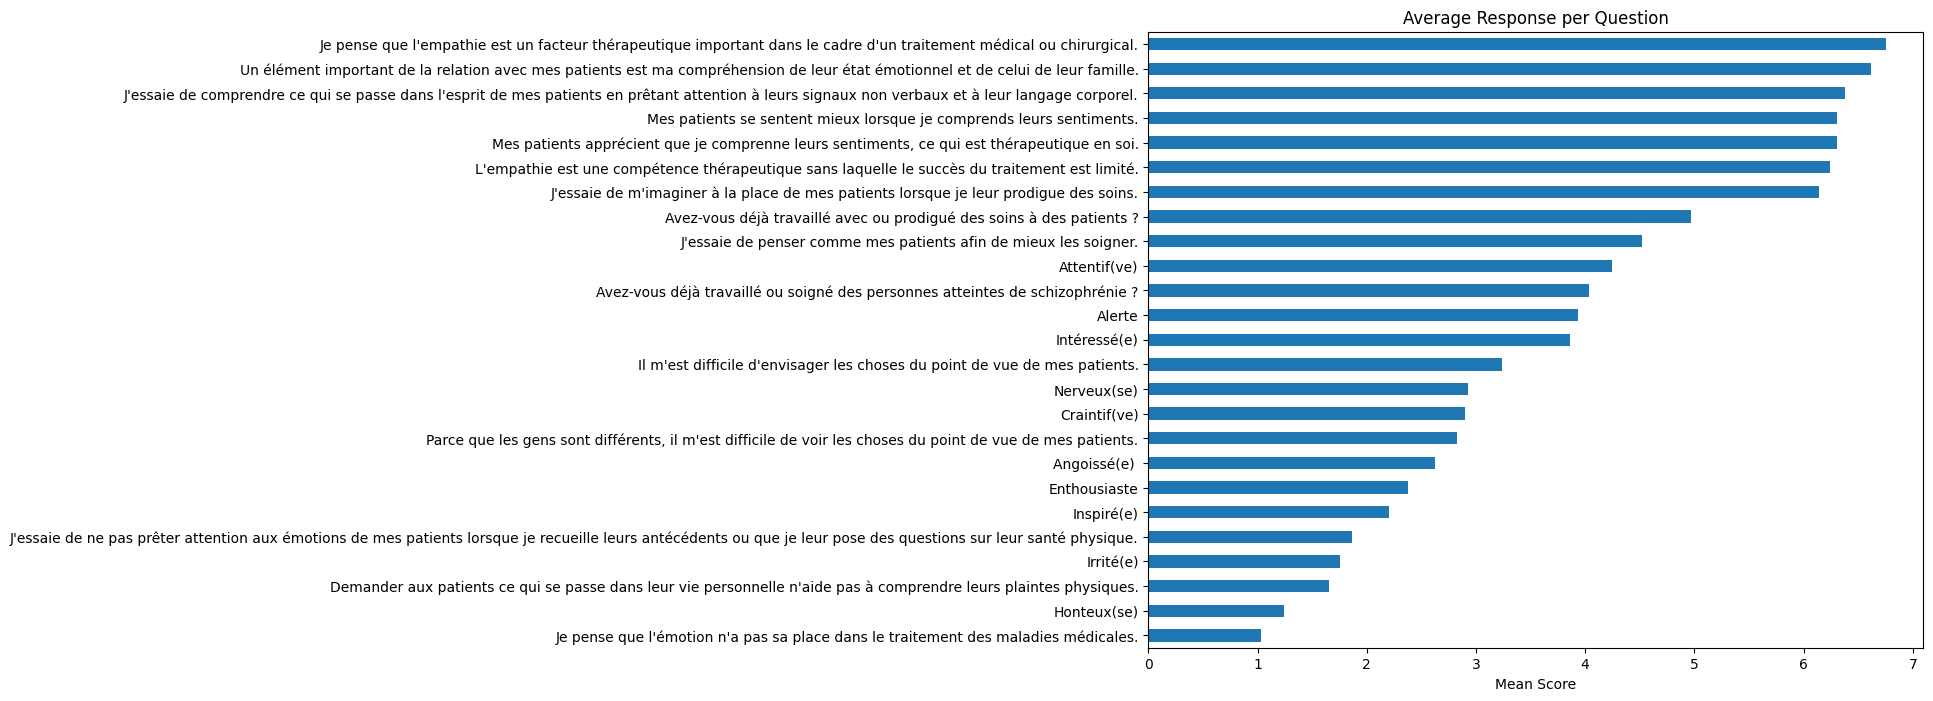

In [7]:

plt.figure(figsize=(10, 8))
means.sort_values(ascending=True).plot(kind='barh')
plt.title('Average Response per Question')
plt.xlabel('Mean Score')
plt.tight_layout()
plt.show()


## 5. Distribution of Selected Questions

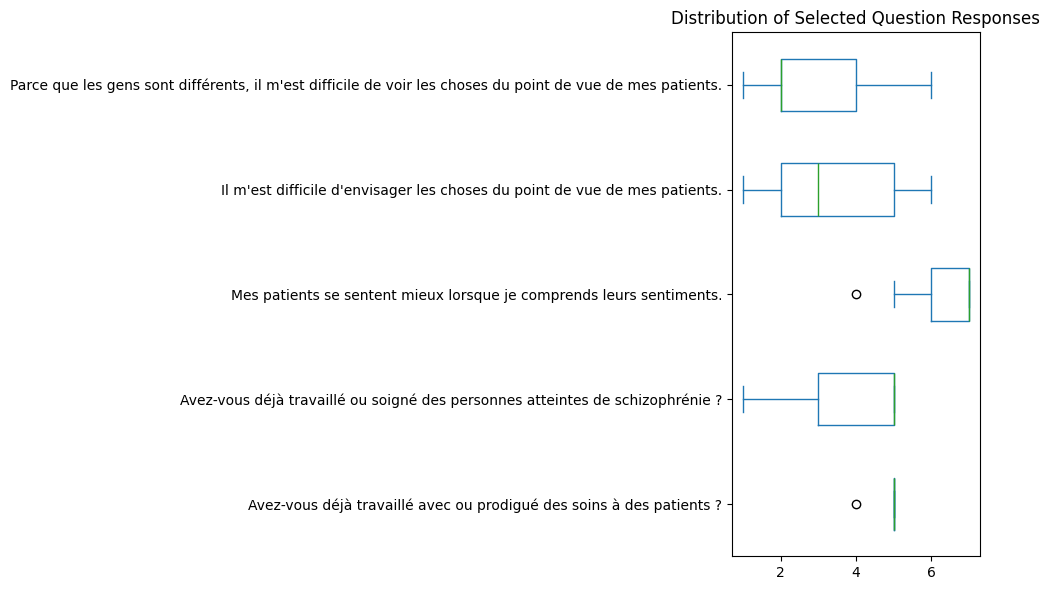

In [8]:

selected = df_clean.columns[:5]  # first 5 questions for example
df_clean[selected].plot(kind='box', figsize=(10, 6), vert=False)
plt.title('Distribution of Selected Question Responses')
plt.tight_layout()
plt.show()


## 6. Correlation Heatmap (Optional)

/var/folders/yw/fnjjn59j6w7_8fvtgz49bpk80000gn/T/ipykernel_67479/2593677286.py:4: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


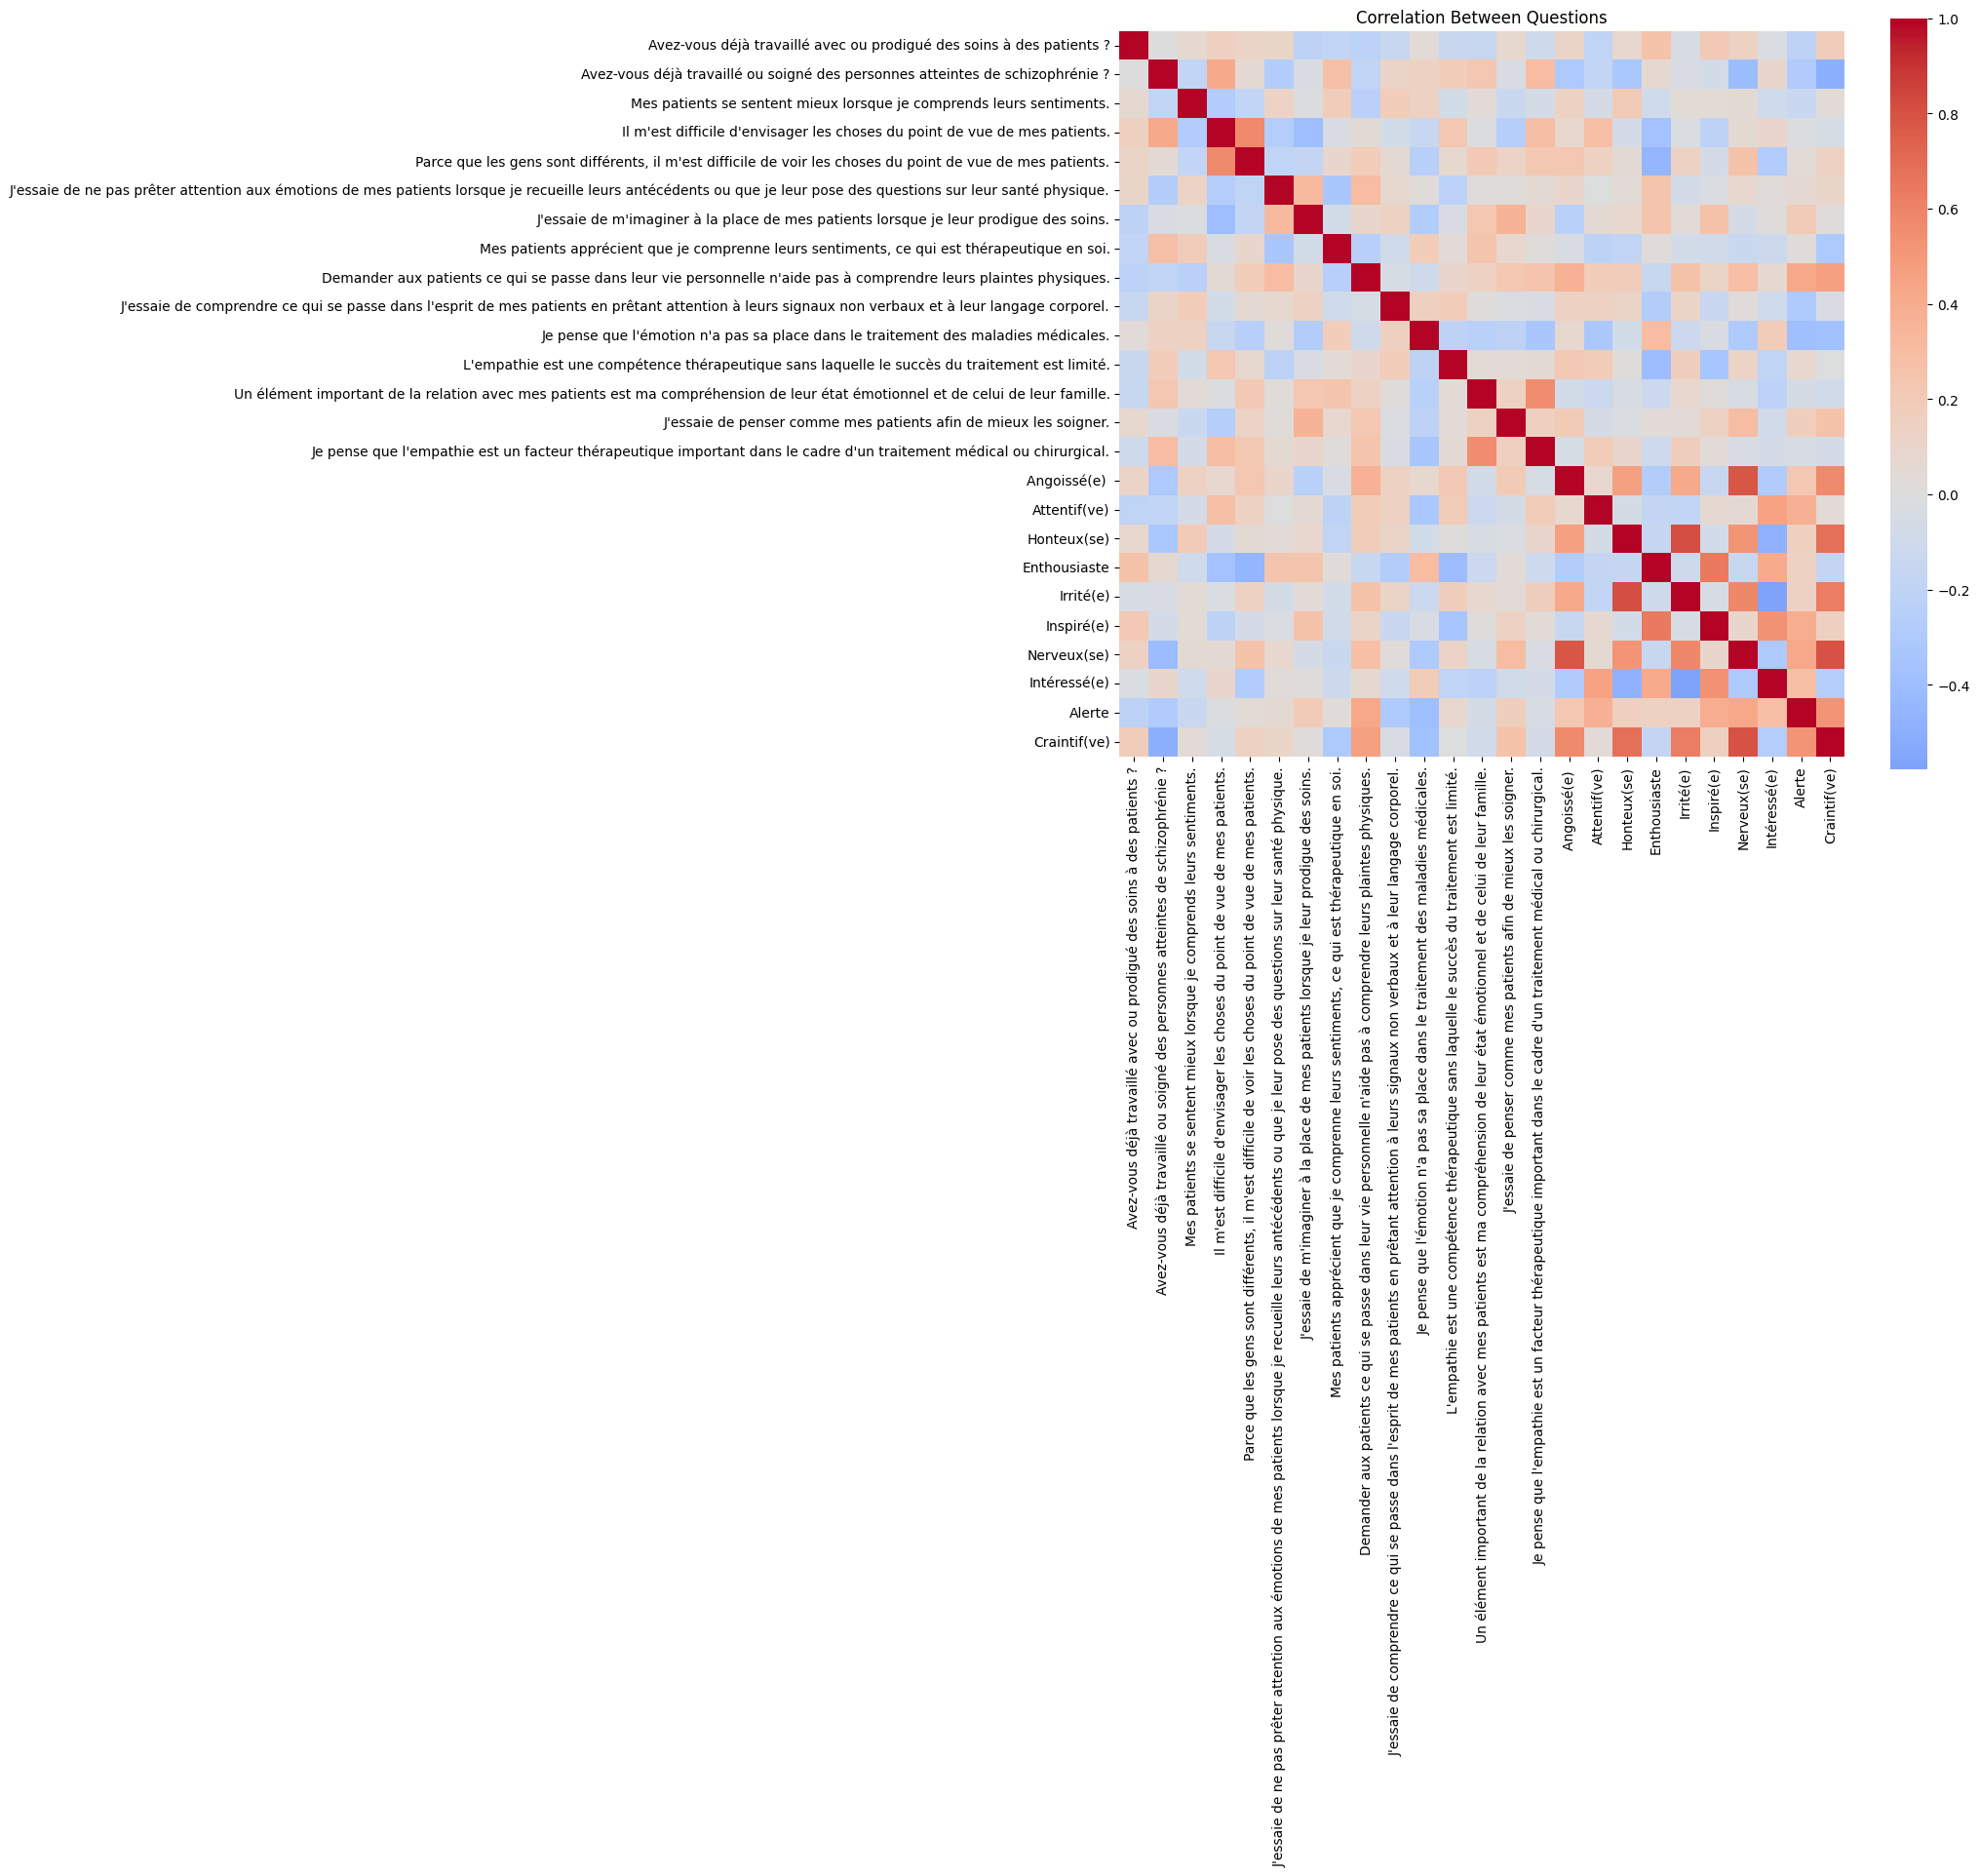

In [9]:

plt.figure(figsize=(12, 10))
sns.heatmap(df_clean.corr(), cmap='coolwarm', center=0, square=True)
plt.title('Correlation Between Questions')
plt.tight_layout()
plt.show()
